# Carregamento dos dados

In [56]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df1 = pd.read_csv('State_of_data_2022.csv')
df1.shape

(4271, 353)

In [3]:
df1.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pré-Processamento dos Dados

In [4]:
df = df1.copy()

In [5]:
# Fazendo um primeiro filtro de colunas do dataframe (fiz uma análise das colunas manualmente no excel pra essa primeira seleção)
df = df[["('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_g ', 'vive_no_brasil')",
           "('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')",
           "('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_f ', 'Cargo Atual')",
           "('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
           "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
           "('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')",
           "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')",
           "('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')",
           "('P4_a_1 ', 'Atuacao')","('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')","('P4_d_1 ', 'SQL')","('P4_d_2 ', 'R ')",
           "('P4_d_3 ', 'Python')","('P4_d_4 ', 'C/C++/C#')","('P4_d_5 ', '.NET')","('P4_d_6 ', 'Java')","('P4_d_7 ', 'Julia')","('P4_d_8 ', 'SAS/Stata')",
           "('P4_d_9 ', 'Visual Basic/VBA')","('P4_d_10 ', 'Scala')","('P4_d_11 ', 'Matlab')","('P4_d_12 ', 'PHP')","('P4_d_13 ', 'Javascript')",
           "('P4_d_14 ', 'Não utilizo nenhuma linguagem')","('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')",
]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 42 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   ('P1_a ', 'Idade')                                                                                                                      4197 non-null   float64
 1   ('P1_a_1 ', 'Faixa idade')                                                                                                              4271 non-null   object 
 2   ('P1_b ', 'Genero')                                                                                                                     4262 non-null   object 
 3   ('P1_c ', 'Cor/raca/etnia')                                    

In [7]:
# Renomeando as colunas
# Função para extrair o nome da coluna dos títulos
def extract_column_name(title):
    return title.split(", ")[1][1:-2]

# Renomear as colunas
df.columns = [extract_column_name(title) for title in df.columns]

In [8]:
df.columns

Index(['Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD',
       'vive_no_brasil', 'uf onde mora', 'Regiao onde mora', 'Nivel de Ensino',
       'Área de Formação', 'Qual sua situação atual de trabalho?', 'Setor',
       'Numero de Funcionarios', 'Gestor?', 'Cargo Atual', 'Nivel',
       'Faixa salarial',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Você participou de entrevistas de emprego nos últimos 6 meses?',
       'Você pretende mudar de emprego nos próximos 6 meses?',
       'Atualmente qual a sua forma de trabalho?',
       'Sua empresa passu por Layoff em 2022?',
       'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?',
       'Atuacao',
       'Quais das linguagens listadas abaixo você utiliza no trabalho?', 'SQL',
       'R ', 'P

In [9]:
# Renomeando a coluna 'target' e colocando-a na posição 1
df.rename(columns={"Faixa salarial":'target'}, inplace = True)
target = df.pop("target")
df.insert(0,'target', target)
df.head()

,target,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,...,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem,Há quanto tempo você busca uma oportunidade na área de dados?
0,de R$ 8.001/mês a R$ 12.000/mês,39.0,35-39,Masculino,Parda,Não,True,DF,Centro-oeste,Pós-graduação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,de R$ 4.001/mês a R$ 6.000/mês,32.0,30-34,Masculino,Parda,Não,True,PA,Norte,Graduação/Bacharelado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,de R$ 12.001/mês a R$ 16.000/mês,53.0,50-54,Masculino,Branca,Não,True,DF,Centro-oeste,Pós-graduação,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,de R$ 12.001/mês a R$ 16.000/mês,27.0,25-29,Masculino,Branca,Não,True,MG,Sudeste,Doutorado ou Phd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,de R$ 6.001/mês a R$ 8.000/mês,46.0,45-49,Feminino,Branca,Não,True,PA,Norte,Pós-graduação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
df.isna().sum()

target                                                                                                                        577
Idade                                                                                                                          74
Faixa idade                                                                                                                     0
Genero                                                                                                                          9
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

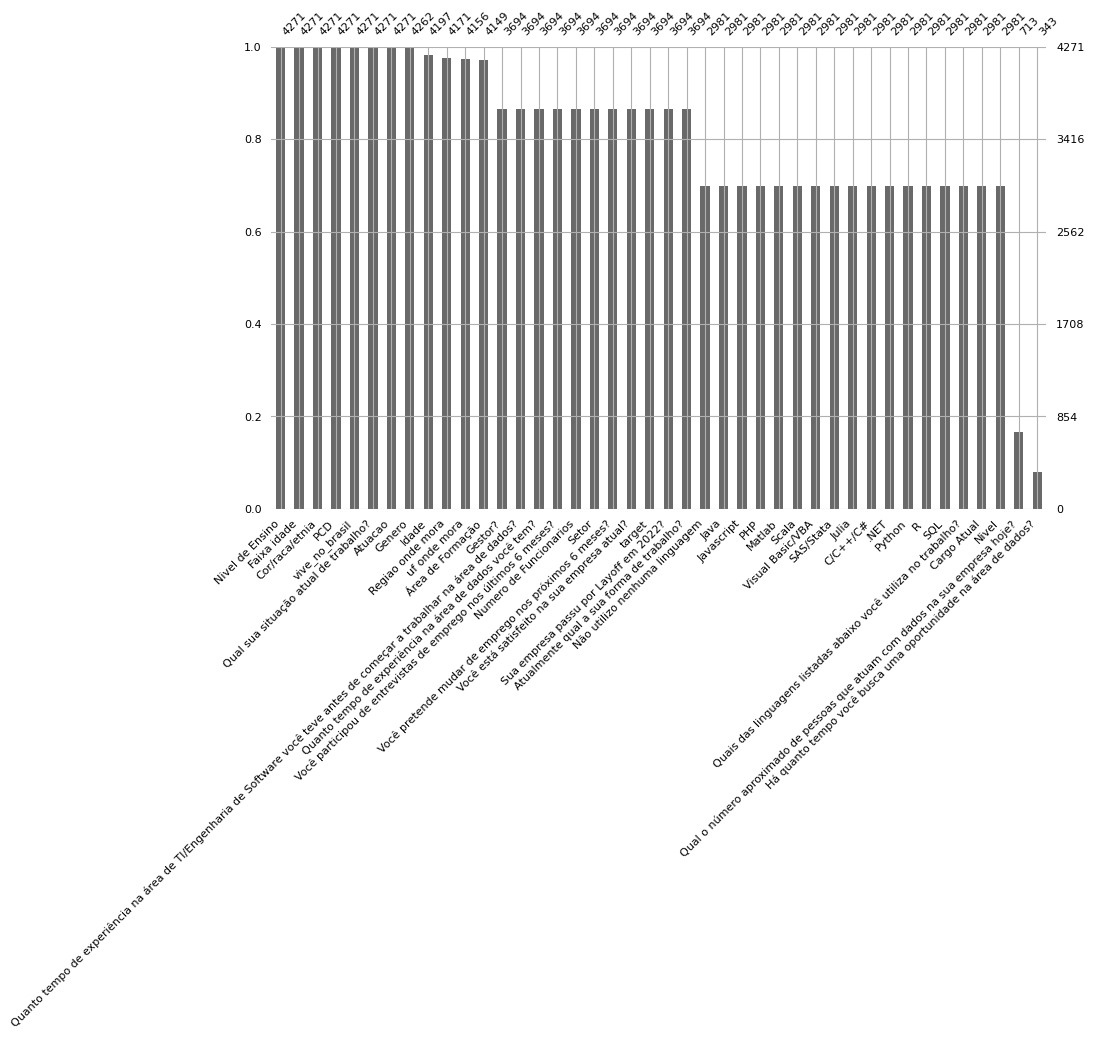

In [11]:
# Visualização dos valores missings 
msno.bar(df, sort="descending", figsize=(10,6), fontsize=8).grid()

Inicialmente vou remover os registros que temos NA na coluna target.  
Em seguida vou remover colunas que têm muitos valores NA que vão acabar tirando grande parte da nossa amostra. 

In [12]:
# Removendo valores de target = NA
df_filtered = df.dropna(subset=['target'])
df_filtered.isna().sum()

target                                                                                                                          0
Idade                                                                                                                          51
Faixa idade                                                                                                                     0
Genero                                                                                                                          7
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

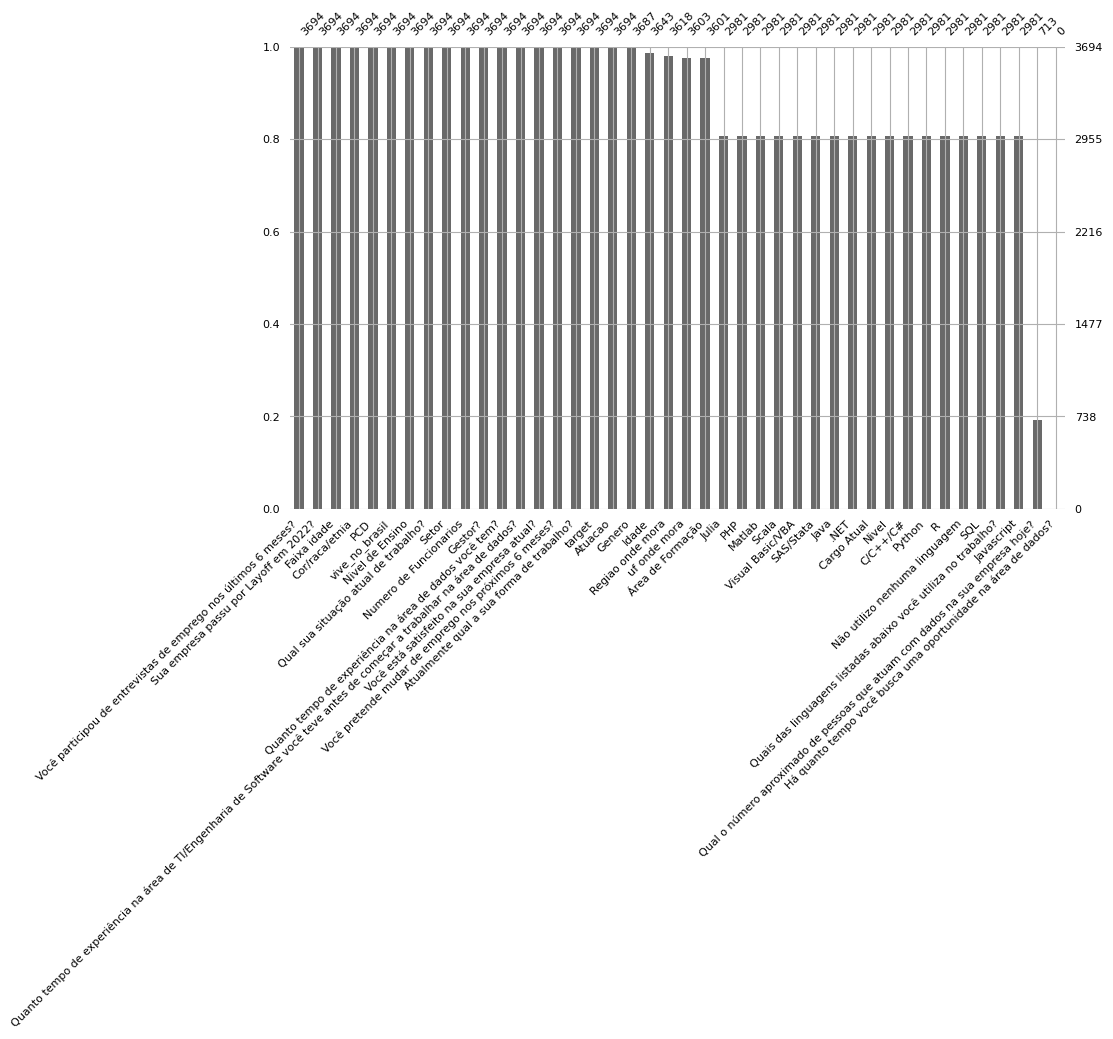

In [13]:
# Visualização dos NA
msno.bar(df_filtered, sort="descending", figsize=(10,6), fontsize=8).grid()

In [14]:
# Visualização onde temos Nível = NA
df_filtered[(df_filtered['Nivel'].isna())].iloc[:,5:20].sample(10)

,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo Atual,Nivel,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?
3281,Não,True,AM,Norte,Graduação/Bacharelado,Marketing / Publicidade / Comunicação / Jornal...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,de 1 a 5,True,NaN,NaN,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True
16,Não,True,PB,Nordeste,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empreendedor ou Empregado (CNPJ),Tecnologia/Fábrica de Software,de 51 a 100,True,NaN,NaN,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True
1078,Não,True,SP,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,de 101 a 500,True,NaN,NaN,de 3 a 4 anos,de 1 a 2 anos,True
1872,Não,True,PR,Sul,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Varejo,de 1.001 a 3.000,True,NaN,NaN,de 4 a 6 anos,de 1 a 2 anos,False
1414,Não,True,SP,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Outra Opção,Acima de 3.000,True,NaN,NaN,de 7 a 10 anos,Mais de 10 anos,True
3237,Não,True,RS,Sul,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Setor Farmaceutico,Acima de 3.000,True,NaN,NaN,de 4 a 6 anos,Mais de 10 anos,True
2062,Não,True,SP,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,de 1.001 a 3.000,True,NaN,NaN,Mais de 10 anos,de 3 a 4 anos,False
3539,Não,True,DF,Centro-oeste,Mestrado,Economia/ Administração / Contabilidade / Fina...,Servidor Público,Setor Público,de 501 a 1.000,True,NaN,NaN,de 7 a 10 anos,Menos de 1 ano,False
548,Não,True,SP,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Área da Saúde,de 51 a 100,True,NaN,NaN,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True
2118,Não,True,PE,Nordeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,de 101 a 500,True,NaN,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,True


In [15]:
# é possível verificar que todos os valores onde temos 'Cargo Atual' e 'Nivel' como NA, são cargos de Gestor, ou seja, não precisamos da coluna Gestor. Podemos imputar 'Gestor' na coluna 'Cargo Atual' e 'Nivel' para todos os NA e remover a coluna 'Gestor?'
df_filtered[(df_filtered['Cargo Atual'].isna())]['Gestor?'].value_counts()

True    713
Name: Gestor?, dtype: int64

In [16]:
# Valores da coluna gestor pra onde temos Nivel NA
df_filtered[(df_filtered['Nivel'].isna())]['Gestor?'].value_counts()

True    713
Name: Gestor?, dtype: int64

In [17]:
# Valores da coluna gestor pra onde temos Cargo Atual NOT NA
df_filtered[(df_filtered['Cargo Atual'].isna() == False)]['Gestor?'].value_counts()

False    2981
Name: Gestor?, dtype: int64

In [18]:
# Valores da coluna gestor pra onde temos Nivel NOT NA
df_filtered[(df_filtered['Nivel'].isna() == False)]['Gestor?'].value_counts()

False    2981
Name: Gestor?, dtype: int64

In [19]:
# Valores da coluna Cargo ATual
df_filtered[(df_filtered['Cargo Atual'].isna() == False)]['Cargo Atual'].value_counts()

Analista de Dados/Data Analyst                                         639
Cientista de Dados/Data Scientist                                      556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Analista de BI/BI Analyst                                              378
Outra Opção                                                            281
Analista de Negócios/Business Analyst                                  123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Suporte/Analista Técnico                                    72
Analytics Engineer                                                      70
Engenheiro de Machine Learning/ML Engineer                              69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      51
Analista de Inteligência de Mercado/Market Intelligence                 29
Outras Engenharias (não inclui dev)                                     28
Professor                

In [20]:
# Removendo coluna 'Gestor?' e preenchendo os NA com "Gestor" nas colunas 'Nivel' e 'Cargo Atual'
df_filtered2 = df_filtered.copy()
df_filtered2 = df_filtered2.drop(columns=['Gestor?'])
df_filtered2[['Nivel','Cargo Atual']] = df_filtered[['Nivel','Cargo Atual']].fillna('Gestor')
df_filtered2.isna().sum()

target                                                                                                                          0
Idade                                                                                                                          51
Faixa idade                                                                                                                     0
Genero                                                                                                                          7
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

Vou remover as colunas 'Idade', pois esta apresenta valores NA além de também ja termos a coluna de faixa etária.  
Também irei remover as colunas que possuem MUITOS valores NA como 'Há quanto tempo você busca uma oportunidade na área de dados?' e 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'.  
Ainda a decidir se irei remover as colunas das linguagens utilizadas no trabalho

In [21]:
df_filtered2 = df_filtered2.drop(columns=["Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?","Há quanto tempo você busca uma oportunidade na área de dados?", "Idade"])
df_filtered2.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         7
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
vive_no_brasil                                                                                                                 0
uf onde mora                                                                                                                  91
Regiao onde mora                                                                                 

In [22]:
# Checando a relação das colunas 'vive_no_brasil' com 'uf onde mora' e 'Regiao onde mora'
# valores de 'vive_no_brasil' quando temos Regiao onde mora NA
df_filtered2[(df_filtered2['Regiao onde mora'].isna())]['vive_no_brasil'].value_counts()

False    76
Name: vive_no_brasil, dtype: int64

In [23]:
# valores de 'vive_no_brasil' quando temos Regiao onde mora not NA
df_filtered2[(df_filtered2['Regiao onde mora'].isna() == False)]['vive_no_brasil'].value_counts()

True    3618
Name: vive_no_brasil, dtype: int64

Novamente, aqui irei remover a coluna vive_no_brasil e preencher os valores de NA da coluna 'Regiao onde mora' com 'Exterior'. Também irei remover a coluna 'uf onde mora' e manter apenas a 'Regiao onde mora'

In [24]:
df_filtered2 = df_filtered2.drop(columns=['vive_no_brasil', 'uf onde mora'])
df_filtered2['Regiao onde mora'] = df_filtered2['Regiao onde mora'].fillna('Exterior')
df_filtered2.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         7
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

In [25]:
# Visualizando onde temos valores de Genero NA.
# Tenhos três opções: preencher com 'Prefiro não informar', preencher aleatóriamente com base nos valores que temos ou remover esses registros. 
# Vou decidir por dropar os NA da coluna Genero"Prefiro não informar" 
# Vale repensar/testar se vale a pena remover esses juntos com os "Prefiro não informar"
df_filtered2[(df_filtered2['Genero'].isna())]

,target,Faixa idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,...,.NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem
232,de R$ 2.001/mês a R$ 3.000/mês,25-29,NaN,Branca,Não,Sul,Pós-graduação,Ciências Sociais,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1484,de R$ 1.001/mês a R$ 2.000/mês,25-29,NaN,Preta,Não,Sudeste,Graduação/Bacharelado,Outras Engenharias,Estagiário,Finanças ou Bancos,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2463,de R$ 2.001/mês a R$ 3.000/mês,25-29,NaN,Preta,Não,Centro-oeste,Graduação/Bacharelado,Ciências Sociais,Empreendedor ou Empregado (CNPJ),Filantropia/ONG's,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2583,de R$ 8.001/mês a R$ 12.000/mês,25-29,NaN,Branca,Não,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empregado (CLT),Setor Imobiliário/ Construção Civil,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3302,de R$ 3.001/mês a R$ 4.000/mês,25-29,NaN,Parda,Não,Sul,Pós-graduação,Outra opção,Servidor Público,Setor Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3722,de R$ 2.001/mês a R$ 3.000/mês,22-24,NaN,Branca,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3955,de R$ 16.001/mês a R$ 20.000/mês,22-24,NaN,Branca,Não,Sudeste,Mestrado,Outras Engenharias,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_filtered2['Genero'].value_counts()

Masculino               2790
Feminino                 886
Prefiro não informar      11
Name: Genero, dtype: int64

In [27]:
df_filtered3 = df_filtered2.copy()
df_filtered3 = df_filtered3.dropna(subset=['Genero'])
df_filtered3.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         0
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

In [28]:
# Checando valores da coluna 'Área de Formação'
df_filtered3[(df_filtered3['Área de Formação'].isna())]

,target,Faixa idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,...,.NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem
44,Menos de R$ 1.000/mês,17-21,Masculino,Parda,Não,Sul,Não tenho graduação formal,NaN,Prefiro não informar,Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
171,de R$ 16.001/mês a R$ 20.000/mês,40-44,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Tecnologia/Fábrica de Software,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,de R$ 1.001/mês a R$ 2.000/mês,40-44,Feminino,Preta,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Varejo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Parda,Não,Sul,Não tenho graduação formal,NaN,Empregado (CLT),Setor Alimentício,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
318,de R$ 4.001/mês a R$ 6.000/mês,25-29,Masculino,Branca,Não,Sul,Não tenho graduação formal,NaN,Empregado (CLT),Educação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,de R$ 6.001/mês a R$ 8.000/mês,25-29,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4179,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Parda,Não,Sudeste,Prefiro não informar,NaN,Empregado (CLT),Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4208,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4238,de R$ 2.001/mês a R$ 3.000/mês,22-24,Masculino,Branca,Não,Nordeste,Não tenho graduação formal,NaN,Empregado (CLT),Setor Alimentício,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# Confirmando que todos os valores de Área de formação NA são pessoal que nao tem graduação formal
df_filtered3[(df_filtered3['Área de Formação'].isna())]['Nivel de Ensino'].value_counts()

Não tenho graduação formal    84
Prefiro não informar           9
Name: Nivel de Ensino, dtype: int64

In [30]:
# Atribuindo 'Sem Formação Formal' para os valores NA que têm 'Nivel de Ensino' com valor = 'Não tenho graduação formal'.  Irei remover os NA restante logo em seguida

#df_filtered3[((df_filtered3['Área de Formação'].isna()) & (df_filtered3['Nivel de Ensino'] == 'Não tenho graduação formal'))]['Área de Formação'] = 'Sem Formação Formal' --> errado

df_filtered3.loc[(df_filtered3['Área de Formação'].isna()) & (df_filtered3['Nivel de Ensino'] == 'Não tenho graduação formal'), 'Área de Formação'] = 'Sem Formação Formal'
df_filtered3 = df_filtered3.dropna(subset=['Área de Formação'])


In [31]:
df_filtered3.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         0
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

Agora vou remover a pergunta das linguagens utilizadas devido ao grande numero de NA

In [32]:
df_filtered3 = df_filtered3.iloc[:, :-15]
df_filtered3.isna().sum()

target                                                                                                                       0
Faixa idade                                                                                                                  0
Genero                                                                                                                       0
Cor/raca/etnia                                                                                                               0
PCD                                                                                                                          0
Regiao onde mora                                                                                                             0
Nivel de Ensino                                                                                                              0
Área de Formação                                                                                               

In [33]:
df_filtered3.shape

(3678, 21)

In [34]:
# Checando valores da coluna 'Qual sua situação atual de trabalho?'
df_filtered3['Área de Formação'].value_counts()

Computação / Engenharia de Software / Sistemas de Informação/ TI          1367
Outras Engenharias                                                         827
Economia/ Administração / Contabilidade / Finanças/ Negócios               558
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     355
Outra opção                                                                161
Marketing / Publicidade / Comunicação / Jornalismo                         108
Química / Física                                                            85
Sem Formação Formal                                                         84
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                      80
Ciências Sociais                                                            53
Name: Área de Formação, dtype: int64

In [35]:
# Visualizando os valores de todas as variáveis
colunas = df_filtered3.columns
for i in colunas:
    print(i)
    print(df_filtered3[f'{i}'].value_counts())

target
de R$ 8.001/mês a R$ 12.000/mês     751
de R$ 4.001/mês a R$ 6.000/mês      582
de R$ 6.001/mês a R$ 8.000/mês      527
de R$ 12.001/mês a R$ 16.000/mês    437
de R$ 3.001/mês a R$ 4.000/mês      300
de R$ 2.001/mês a R$ 3.000/mês      280
de R$ 16.001/mês a R$ 20.000/mês    228
de R$ 1.001/mês a R$ 2.000/mês      213
de R$ 20.001/mês a R$ 25.000/mês    134
de R$ 25.001/mês a R$ 30.000/mês     77
de R$ 30.001/mês a R$ 40.000/mês     70
Acima de R$ 40.001/mês               45
Menos de R$ 1.000/mês                34
Name: target, dtype: int64
Faixa idade
25-29    1225
30-34     966
35-39     521
22-24     379
40-44     237
45-49     126
17-21     106
50-54      71
55+        47
Name: Faixa idade, dtype: int64
Genero
Masculino               2785
Feminino                 883
Prefiro não informar      10
Name: Genero, dtype: int64
Cor/raca/etnia
Branca                  2388
Parda                    893
Preta                    239
Amarela                  111
Prefiro não informar    

# Análise Exploratória

<AxesSubplot:>

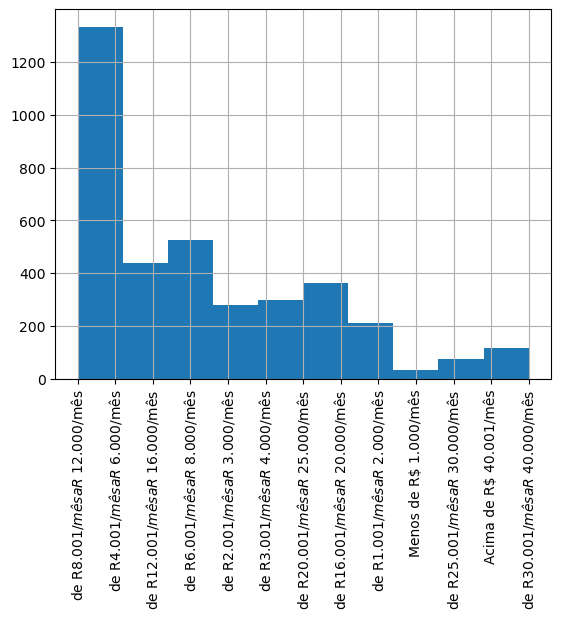

In [36]:
df_filtered3.target.hist(grid = True, xrot = 90)

# Pré-Processamento dos Dados - pt2

Como todas as variáveis que estão sendo usadas são categóricas, teremos que aplicar as técnicas de Label Encoding e One Hot Encoding

In [37]:
df_filtered3['Atuacao'].value_counts()

Análise de Dados       1319
Gestor                  712
Engenharia de Dados     674
Ciência de Dados        625
Outra atuação           348
Name: Atuacao, dtype: int64

In [38]:
# Separando colunas
cols_encod = ['target', 'Faixa idade','Nivel de Ensino','Nivel','Numero de Funcionarios','Quanto tempo de experiência na área de dados você tem?',
              'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?']
cols_one_hot = ['Genero','Cor/raca/etnia', 'PCD','Regiao onde mora','Área de Formação','Qual sua situação atual de trabalho?', 'Setor',
                'Cargo Atual','Você participou de entrevistas de emprego nos últimos 6 meses?','Você pretende mudar de emprego nos próximos 6 meses?',
                'Atualmente qual a sua forma de trabalho?','Sua empresa passu por Layoff em 2022?','Atuacao']
col_binarias = ['Você está satisfeito na sua empresa atual?']

In [39]:
# Encoding

faixa_salario_map = {
    'Menos de R$ 1.000/mês':0,
    'de R$ 1.001/mês a R$ 2.000/mês':1,
    'de R$ 2.001/mês a R$ 3.000/mês':2,
    'de R$ 3.001/mês a R$ 4.000/mês':3,
    'de R$ 4.001/mês a R$ 6.000/mês':4,
    'de R$ 6.001/mês a R$ 8.000/mês':5,
    'de R$ 8.001/mês a R$ 12.000/mês':6,
    'de R$ 12.001/mês a R$ 16.000/mês':7,
    'de R$ 16.001/mês a R$ 20.000/mês':8,
    'de R$ 20.001/mês a R$ 25.000/mês':9,
    'de R$ 25.001/mês a R$ 30.000/mês':10,
    'de R$ 30.001/mês a R$ 40.000/mês':11,
    'Acima de R$ 40.001/mês':12
                     }

faixa_etaria_map ={
    '17-21':0,
    '22-24':1,
    '25-29':2,
    '30-34':3,
    '35-39':4,    
    '40-44':5,
    '45-49':6,    
    '50-54':7,
    '55+':8 
}

nivel_ensino_map = {
    'Não tenho graduação formal':0,
    'Estudante de Graduação':1,
    'Graduação/Bacharelado':2,
    'Pós-graduação':3,    
    'Mestrado':4,
    'Doutorado ou Phd':5,    
}

nivel_map = {
    "Júnior":0,
    "Pleno":1,
    "Sênior":2,
    "Gestor":3    
}

num_funcionario_map = {
    'de 1 a 5':0,
    'de 6 a 10':1,
    'de 11 a 50':2,
    'de 51 a 100':3,
    'de 101 a 500':4,
    'de 501 a 1.000':5,
    'de 1.001 a 3.000':6,
    'Acima de 3.000':7
}

tempo_exp_map = {
    'Não tenho experiência na área de dados':0,
    'Menos de 1 ano':1,
    'de 1 a 2 anos':2,
    'de 3 a 4 anos':3,
    'de 4 a 6 anos':4,
    'de 7 a 10 anos':5,
    'Mais de 10 anos':6
}

tempo_exp_ti_map = {
    'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados':0,
    'Menos de 1 ano':1,
    'de 1 a 2 anos':2,
    'de 3 a 4 anos':3,
    'de 5 a 6 anos':4,
    'de 7 a 10 anos':5,
    'Mais de 10 anos':6
}

# Lista com dicionários para aplicar no meu df
dictss = [faixa_salario_map,faixa_etaria_map,nivel_ensino_map,nivel_map,num_funcionario_map,tempo_exp_map,tempo_exp_ti_map]

> df_encoded vai conter os pre processamento de label encoding e one_hot encoding

In [40]:
df_encoded = df_filtered3.copy()

In [41]:
# Aplicando o Label Enconding
for i in range(0,len(cols_encod)):
    df_encoded[cols_encod[i]] = df_encoded[cols_encod[i]].map(dictss[i])

In [42]:
# Aplicando o One hot Encoding
def one_hot_encoding(df, cols):
    """
    Realiza one-hot encoding.
    
    Parâmetros:
        df (DataFrame): DataFrame contendo as variáveis categóricas.
        cols (list): Lista das colunas a serem codificadas em one-hot encoding.
        
    Retorna:
        DataFrame: O DataFrame com as colunas especificadas codificadas em one-hot encoding.
    """
    return pd.get_dummies(df, columns=cols)



In [43]:
df_encoded = one_hot_encoding(df = df_encoded, cols = cols_one_hot)
df_encoded.head()

,target,Faixa idade,Nivel de Ensino,Numero de Funcionarios,Nivel,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Genero_Feminino,Genero_Masculino,...,Atualmente qual a sua forma de trabalho?_Modelo híbrido com dias fixos de trabalho presencial,Atualmente qual a sua forma de trabalho?_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),Sua empresa passu por Layoff em 2022?_Não ocorreram layoffs/demissões em massa na empresa em que trabalho,"Sua empresa passu por Layoff em 2022?_Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado","Sua empresa passu por Layoff em 2022?_Sim, ocorreram layoffs/demissões em massa na empresa em que trabalho mas não fui afetado",Atuacao_Análise de Dados,Atuacao_Ciência de Dados,Atuacao_Engenharia de Dados,Atuacao_Gestor,Atuacao_Outra atuação
0,6,4,3,7,0,2,5,True,0,1,...,0,0,1,0,0,0,0,1,0,0
1,4,3,2,7,3,3,1,False,0,1,...,0,0,1,0,0,0,0,0,1,0
2,7,7,3,7,1,3,6,False,0,1,...,1,0,1,0,0,0,1,0,0,0
3,7,2,5,7,2,4,0,True,0,1,...,0,1,1,0,0,0,1,0,0,0
4,5,6,3,4,1,0,6,False,1,0,...,0,0,1,0,0,0,0,0,0,1


In [44]:
# Aplicando 0 e 1 pra vairáveis booleana 'Você está satisfeito na sua empresa atual?'
df_encoded['Você está satisfeito na sua empresa atual?'] = df_encoded['Você está satisfeito na sua empresa atual?'].map({True: 1, False: 0})
df_encoded.head()

,target,Faixa idade,Nivel de Ensino,Numero de Funcionarios,Nivel,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Genero_Feminino,Genero_Masculino,...,Atualmente qual a sua forma de trabalho?_Modelo híbrido com dias fixos de trabalho presencial,Atualmente qual a sua forma de trabalho?_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),Sua empresa passu por Layoff em 2022?_Não ocorreram layoffs/demissões em massa na empresa em que trabalho,"Sua empresa passu por Layoff em 2022?_Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado","Sua empresa passu por Layoff em 2022?_Sim, ocorreram layoffs/demissões em massa na empresa em que trabalho mas não fui afetado",Atuacao_Análise de Dados,Atuacao_Ciência de Dados,Atuacao_Engenharia de Dados,Atuacao_Gestor,Atuacao_Outra atuação
0,6,4,3,7,0,2,5,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,4,3,2,7,3,3,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,7,7,3,7,1,3,6,0,0,1,...,1,0,1,0,0,0,1,0,0,0
3,7,2,5,7,2,4,0,1,0,1,...,0,1,1,0,0,0,1,0,0,0
4,5,6,3,4,1,0,6,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Machine Learning

- Modelo de Regressão Logistico Multinomial
- Random Forest (RF)
- Gradient Boosting Machines (GBM)
- Redes Neurais Artificiais (NN)
- Support Vector Machines (SVM)

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Copia do df pre processado
df_ml = df_encoded.copy()

In [47]:
# Fuunção para separar a coluna target das preditoras e separar em amostra de treino e teste
def split_data(df, target_column, test_size, random_state):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    return X_train, X_test, y_train, y_test   


In [48]:
# Atribuindo os dados de treino e teste
X_train, X_test, y_train, y_test = split_data(df= df_ml, target_column='target', test_size=0.25, random_state=19)

In [49]:
# Inicializando o modelo
random_forest = RandomForestClassifier(n_estimators=100, random_state=19)

# Treinando o modelo
random_forest.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Avalie a precisão do modelo
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy_rf)
print('f1-score:', f1_rf)

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))


Accuracy: 0.35108695652173916
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.47      0.57      0.51        49
           2       0.40      0.34      0.37        71
           3       0.34      0.22      0.27        73
           4       0.34      0.47      0.40       137
           5       0.39      0.26      0.31       128
           6       0.36      0.56      0.44       184
           7       0.29      0.24      0.26       129
           8       0.29      0.39      0.33        46
           9       0.12      0.07      0.09        30
          10       0.00      0.00      0.00        27
          11       0.60      0.14      0.23        21
          12       0.00      0.00      0.00        17

    accuracy                           0.35       920
   macro avg       0.30      0.26      0.26       920
weighted avg       0.34      0.35      0.33       920



In [50]:
# Buscando os melhores hiperparametros com o GridSearch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Defina os hiperparâmetros que deseja ajustar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [None, 10, 20],        # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],    # O número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4]      # O número mínimo de amostras necessárias para estar em um nó folha
}

# Inicialize o modelo Random Forest
random_forest = RandomForestClassifier(random_state=19)

# Inicialize o objeto GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Realize o ajuste aos dados de treinamento
grid_search.fit(X_train, y_train)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Faça previsões com o modelo otimizado
y_pred = grid_search.predict(X_test)

# Avalie o desempenho do modelo otimizado
accuracy_rf_optimized = accuracy_score(y_test, y_pred)
f1_rf_optimized = f1_score(y_test, y_pred, average='weighted')
precision_rf_optimized = precision_score(y_test, y_pred, average='weighted')
recall_rf_optimized = recall_score(y_test, y_pred, average='weighted')
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_rf_optimized)
print("F1-Score:", f1_rf_optimized)
print("Precisão:", precision_rf_optimized)
print("Revocação:", recall_rf_optimized)
print("Matriz de Confusão:")
print(conf_matrix_rf_optimized)

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))


c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.35108695652173916
F1-Score: 0.3299442160303933
Precisão: 0.3366043406572428
Revocação: 0.35108695652173916
Matriz de Confusão:
[[  1   7   0   0   0   0   0   0   0   0   0   0   0]
 [  1  28  14   3   2   0   0   1   0   0   0   0   0]
 [  0  17  24   8  16   0   6   0   0   0   0   0   0]
 [  0   5   7  16  36   5   4   0   0   0   0   0   0]
 [  0   2  10  11  64  17  30   2   1   0   0   0   0]
 [  0   1   2   5  40  33  41   6   0   0   0   0   0]
 [  0   0   1   3  24  17 103  27   6   3   0   0   0]
 [  0   0   2   0   3   9  72  31  10   2   0   0   0]
 [  0   0   0   1   0   0  15   8  18   4   0   0   0]
 [  1   0   0   0   1   1   5   8  11   2   1   0   0]
 [  0   0   0   0   0   1   4  10   9   1   0   2   0]
 [  0   0   0   0   0   0   5   6   3   2   1   3   1]
 [  0   0   0   0   0   1   2   7   4   2   1   0   0]]
              precision    recall  f

> Como temos uma variável target um pouco desbalanceada, tentarei aplicar o SMOTE para verificar se melhor o modelo

0      34
1     213
2     280
3     300
4     582
5     527
6     751
7     437
8     228
9     134
10     77
11     70
12     45
Name: target, dtype: int64


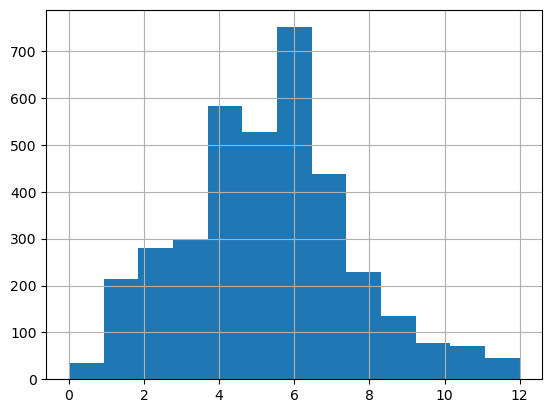

In [51]:
df_ml['target'].hist(bins=13)
print(df_ml['target'].value_counts().sort_index())

Distribuição das classes após SMOTE:
0     567
1     567
2     567
3     567
4     567
5     567
6     567
7     567
8     567
9     567
10    567
11    567
12    567
Name: target, dtype: int64


<AxesSubplot:>

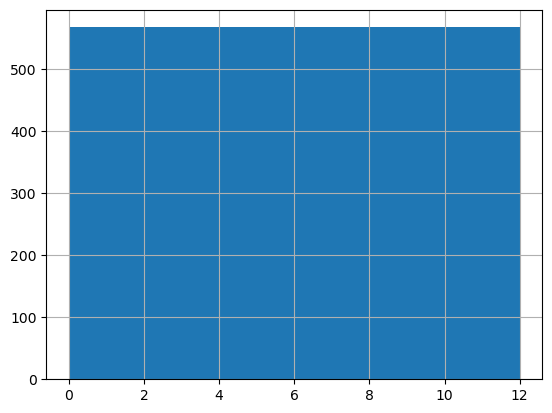

In [52]:
# Inicialize o SMOTE
smote = SMOTE(random_state=19)

# Aplique o SMOTE ao conjunto de treinamento (X_train e y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verifique a distribuição das classes após a aplicação do SMOTE
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_resampled).value_counts().sort_index())
y_train_resampled.hist(bins = 13)

In [54]:
# Buscando os melhores hiperparametros com o GridSearch para os dados de treino com SMOTE aplicado
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [None, 10, 20],        # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],    # O número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4]       # O número mínimo de amostras necessárias para estar em um nó folha
}

# Inicialize o objeto GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1)

# Realize o ajuste aos dados de treinamento resampleados
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Faça previsões com o modelo otimizado usando o conjunto de teste
y_pred = grid_search.predict(X_test)

# Avalie o desempenho do modelo otimizado
accuracy_rf_smote = accuracy_score(y_test, y_pred)
f1_rf_smote = f1_score(y_test, y_pred, average='weighted')
#auc_roc = roc_auc_score(y_test, y_pred)
precision_rf_smote = precision_score(y_test, y_pred, average='weighted')
recall_rf_smote = recall_score(y_test, y_pred, average='weighted')
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_rf_smote)
print("F1-Score:", f1_rf_smote)
#print("AUC-ROC:", auc_roc)
print("Precisão:", precision_rf_smote)
print("Revocação:", recall_rf_smote)
print("Matriz de Confusão:")
print(conf_matrix_rf_smote)


# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))


c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ =

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.34347826086956523
F1-Score: 0.3407525623573868
Precisão: 0.3456288448625068
Revocação: 0.34347826086956523
Matriz de Confusão:
[[ 3  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 32 12  3  0  0  0  0  1  0  0  0  0]
 [ 0 22 24 10  9  2  4  0  0  0  0  0  0]
 [ 1  8 12 17 24  7  1  2  1  0  0  0  0]
 [ 0  4 10 15 54 28 15  5  5  0  0  1  0]
 [ 0  1  2 14 25 36 37  8  1  2  0  1  1]
 [ 0  0  1  4 19 26 81 24 21  3  2  2  1]
 [ 1  0  1  0  4 12 44 40 16  7  1  1  2]
 [ 0  0  0  2  0  0 10 11 12  7  2  2  0]
 [ 0  0  0  0  1  2  2  4 12  6  1  2  0]
 [ 0  0  0  0  0  1  1  6  5  2  3  7  2]
 [ 0  0  0  0  0  0  1  8  2  1  1  5  3]
 [ 1  0  0  0  0  1  0  4  2  4  0  2  3]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.44      0.65      0.53        49
           2       0.39      0.34      0.3

> Tivemos uma redução na acurácia do modelo. Portanto nesse caso o modelo ficar melhor sem o uso da técnica de SMOTE

## Modelo de Regressão Logistico Multinomial

In [60]:
# Inicialize e ajuste o modelo de regressão logística multinomial
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

# Faça previsões com o modelo
y_pred = logistic_model.predict(X_test)

# Avaliando o desempenho
accuracy_rlm = accuracy_score(y_test, y_pred)
f1_rlm = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy_rlm)
print("F1-Score:", f1_rlm)

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))

Accuracy: 0.3532608695652174
F1-Score: 0.341634490858485
              precision    recall  f1-score   support

           0       0.29      0.25      0.27         8
           1       0.58      0.59      0.59        49
           2       0.48      0.41      0.44        71
           3       0.35      0.27      0.31        73
           4       0.35      0.44      0.39       137
           5       0.33      0.20      0.25       128
           6       0.37      0.57      0.44       184
           7       0.40      0.26      0.32       129
           8       0.21      0.24      0.22        46
           9       0.10      0.13      0.11        30
          10       0.08      0.04      0.05        27
          11       0.22      0.10      0.13        21
          12       0.38      0.18      0.24        17

    accuracy                           0.35       920
   macro avg       0.32      0.28      0.29       920
weighted avg       0.35      0.35      0.34       920



c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Aplicando o mesmo algortimo com o dataset apos aplicacao do SMOTE -> nao houve mudança 
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Faça previsões com o modelo
y_pred = logistic_model.predict(X_test)

# Avaliando o desempenho
accuracy_rlm = accuracy_score(y_test, y_pred)
f1_rlm = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))

Accuracy: 0.34347826086956523
F1-Score: 0.3407525623573868
              precision    recall  f1-score   support

           0       0.13      0.25      0.17         8
           1       0.55      0.59      0.57        49
           2       0.41      0.35      0.38        71
           3       0.30      0.23      0.26        73
           4       0.34      0.39      0.36       137
           5       0.32      0.25      0.28       128
           6       0.38      0.53      0.44       184
           7       0.43      0.28      0.34       129
           8       0.24      0.28      0.26        46
           9       0.09      0.13      0.11        30
          10       0.00      0.00      0.00        27
          11       0.17      0.14      0.15        21
          12       0.18      0.12      0.14        17

    accuracy                           0.34       920
   macro avg       0.27      0.27      0.27       920
weighted avg       0.34      0.34      0.33       920



In [61]:
# Tunning dos hiperparâmetros com GridSearch
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parâmetro de regularização
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Algoritmo de otimização
    'max_iter': [100, 200, 300]  # Número máximo de iterações
}

# Inicialize o modelo de regressão logística multinomial
logistic_model = LogisticRegression(multi_class='multinomial')

# Inicialize o objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Realize o ajuste aos dados de treinamento
grid_search.fit(X_train, y_train)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Faça previsões com o modelo otimizado usando o conjunto de teste
y_pred = grid_search.predict(X_test)



accuracy_rlm_optimized = accuracy_score(y_test, y_pred)
f1_rlm_optimized = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy_rlm_optimized)
print("F1-Score:", f1_rlm_optimized)

Melhores parâmetros: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
F1-Score do modelo otimizado: 0.3394462528391323
Accuracy: 0.34891304347826085
F1-Score: 0.3394462528391323


c:\Users\rafajovelho\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Tunning dos hiperparâmetros com GridSearch para os dados com SMOTE
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parâmetro de regularização
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Algoritmo de otimização
    'max_iter': [100, 200, 300]  # Número máximo de iterações
}

# Inicialize o modelo de regressão logística multinomial
logistic_model = LogisticRegression(multi_class='multinomial')

# Inicialize o objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Realize o ajuste aos dados de treinamento
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Faça previsões com o modelo otimizado usando o conjunto de teste
y_pred = grid_search.predict(X_test)

# Avalie o desempenho do modelo otimizado
f1_score_optimized = f1_score(y_test, y_pred, average='weighted')
print("F1-Score do modelo otimizado:", f1_score_optimized)


accuracy_rlm_optimized_smote = accuracy_score(y_test, y_pred)
f1_rlm_optimized_smote = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy_rlm_optimized_smote)
print("F1-Score:", f1_rlm_optimized_smote)

##  Random Forest

## Gradient Boosting Machines

## Redes Neurais Artificiais

## Support Vector Machine (SVM)

Acurácia (Accuracy): A acurácia é a proporção de exemplos classificados corretamente pelo modelo em relação ao total de exemplos. É uma métrica simples e fácil de interpretar, mas pode ser enganosa em casos de classes desbalanceadas.

AUC-ROC: A área sob a curva ROC (Receiver Operating Characteristic) é uma métrica que avalia a capacidade do modelo de distinguir entre as classes positiva e negativa. Uma pontuação AUC-ROC de 1.0 indica um modelo perfeito, enquanto uma pontuação de 0.5 indica um modelo que não é melhor do que o acaso. A AUC-ROC é útil para avaliar o desempenho geral do modelo, independentemente do ponto de corte utilizado.

F1-Score: O F1-Score é a média harmônica da precisão e da revocação. Ele fornece um equilíbrio entre precisão e revocação e é calculado como 2 * (Precisão * Revocação) / (Precisão + Revocação). O F1-Score é uma métrica útil quando há um desequilíbrio entre as classes ou quando ambas as métricas de precisão e revocação são importantes.

Precisão e Revocação (Precision and Recall): A precisão mede a proporção de exemplos positivos previstos corretamente em relação a todos os exemplos previstos como positivos, enquanto a revocação mede a proporção de exemplos positivos que foram previstos corretamente em relação a todos os exemplos positivos reais. Estas métricas são úteis quando o custo dos falsos positivos e falsos negativos é diferente.

Matriz de Confusão: A matriz de confusão é uma tabela que mostra as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos. Ela fornece uma visão mais detalhada do desempenho do modelo em diferentes classes.